In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
 
def plot_cm(testY, y_pred):
    from sklearn.metrics import classification_report,confusion_matrix
#     y_pred=np.argmax(testX_pred_i_LSTM, axis=1)
#     y_test=np.argmax(testY, axis=1)
    cm = confusion_matrix(testY, y_pred)

    print(cm)
    print(classification_report(testY,y_pred,digits=4))


    class_names = ['1','2','3']
    plot_confusion_matrix(cm, class_names)
    plot_confusion_matrix(cm, class_names, normalize=False)
    
def plot_confusion_matrix(cm, classes=['1','2','3'],
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):   #plt.cm.Blues、plt.cm.bone_r
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        from sklearn.metrics import classification_report
        import itertools
        import matplotlib.pyplot as plt
        from sklearn.metrics import confusion_matrix
        import numpy as np
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)
        plt.figure(figsize = (7, 7))
        plt.imshow(cm, interpolation='none', cmap=cmap)
        plt.title(title,size=20)
        plt.colorbar(aspect=5)
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45, size=18)
        plt.yticks(tick_marks, classes, size=18)

        fmt = '.4f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), fontsize=18,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label',size=20)
        plt.xlabel('Predicted label',size=20)
        plt.tight_layout()



In [3]:
train_dir = pd.read_csv("../Training/train_dir.csv")
test_dir = pd.read_csv("../Testing/test_dir.csv")
print(len(train_dir), len(test_dir))

678 170


# 總體sample_based 預測結果

[[53440 10661   100]
 [11879 56961  8982]
 [ 1139 11935 52877]]
              precision    recall  f1-score   support

           0     0.8041    0.8324    0.8180     64201
           1     0.7160    0.7319    0.7239     77822
           2     0.8534    0.8018    0.8268     65951

    accuracy                         0.7851    207974
   macro avg     0.7912    0.7887    0.7896    207974
weighted avg     0.7868    0.7851    0.7856    207974

Normalized confusion matrix
[[0.83238579 0.1660566  0.00155761]
 [0.15264321 0.73193955 0.11541723]
 [0.0172704  0.18096769 0.80176191]]
Confusion matrix, without normalization
[[53440 10661   100]
 [11879 56961  8982]
 [ 1139 11935 52877]]


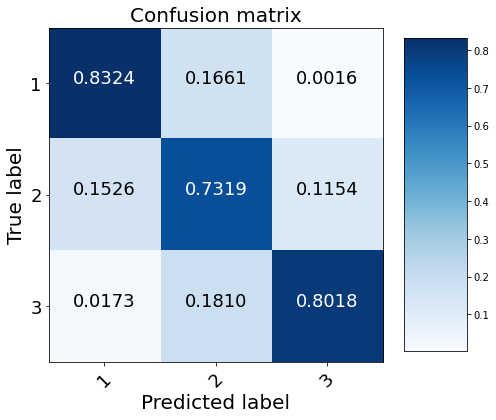

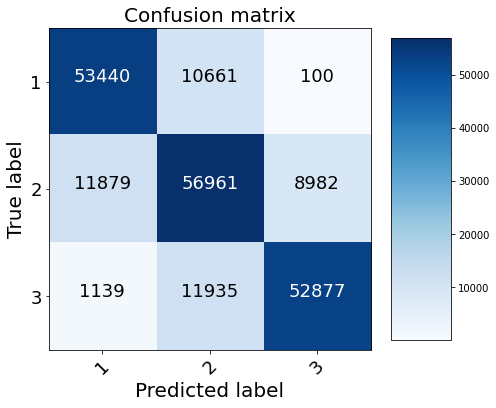

In [7]:

Bdriverid=[31932651,31931745,31929871,31932404,31902662,
           31932370,31928725,31932602,31931992,31902118] 
Y_pred = []
Y_true = []

test_dir_ = test_dir.values
test_dir_ = test_dir_.reshape(-1,)
for i in test_dir_:
    a = os.path.split(i)[0]
#     print(a)
    y_pred = np.load(a + '/results/y_pred_DE_RF_05s.npy')
    y = pd.read_csv(a + '/Y_level3_05s.csv')
    y_pred=np.argmax(y_pred, axis=1)
    y = y.values -1
    y = y.reshape(-1)
#     print(y_pred.shape, y.shape)
    Y_pred.extend(y_pred)
    Y_true.extend(y)
            
plot_cm(Y_true, Y_pred)

# journey-based results
## 算各個旅次的真值、預測值

In [8]:
# 母體比值
ratio_05s = {1: 331851, 2: 415120, 3: 339537}
ratio_1s = {1: 166929, 2: 759464, 3: 160115}
ratio_15s = {1: 72400, 2: 942859, 3: 71249}
def ratio_count(y):
    unique, counts = np.unique(y, return_counts=True)
    print(dict(zip(unique, counts)))
    return dict(zip(unique, counts))

def level_journey_based(j,k):
    # 設定default，會自動按照key排序
    j.setdefault(1, 0)
    j.setdefault(2, 0)
    j.setdefault(3, 0)

    print(j)
#     print(j[1],j[2],j[3])
#     if len(list(j.keys())) == 3:
    if j[3]/(j[1]+j[2]+j[3]) > k[3] / (k[1]+k[2]+k[3]) :
        return 3
    elif j[2]/(j[1]+j[2]+j[3]) > k[2] / (k[1]+k[2]+k[3]) :
        return 2
    elif j[3] > j[1]:
        return 3
    else:
        return 1


In [10]:
import time
start = time.time()

truelevel_journey_based_all = []
predlevel_journey_based_all = []

test_dir_ = test_dir.values
test_dir_ = test_dir_.reshape(-1,)
for i in test_dir_:
    print(i)
    a = os.path.split(i)[0]

#     if not os.path.exists(a + '/results_journey_based'):
#         os.mkdir(a + '/results_journey_based')

    y = pd.read_csv(a + '/Y_level3_05s.csv')
    y_pred = np.load(a + '/results/y_pred_DE_RF_05s.npy')
    # journel_based level identified
    ratio_true = ratio_count(y)
    truelevel_journey_based = level_journey_based(ratio_true, ratio_05s)
    truelevel_journey_based_all.append(truelevel_journey_based)
    
    y_pred=np.argmax(y_pred, axis=1)
    y_pred = y_pred+1

    ratio_pred = ratio_count(y_pred)
    predlevel_journey_based = level_journey_based(ratio_pred, ratio_05s)
    predlevel_journey_based_all.append(predlevel_journey_based)
    
    # reshape for save to df_to_csv
    truelevel_journey_based_r = np.array(truelevel_journey_based).reshape(-1,1)
    predlevel_journey_based_r = np.array(predlevel_journey_based).reshape(-1,1)
    
    truelevel_journey_based_all_r = np.array(truelevel_journey_based_all).reshape(-1,1)
    predlevel_journey_based_all_r = np.array(predlevel_journey_based_all).reshape(-1,1)
    
    pd.DataFrame(truelevel_journey_based_r).to_csv(a + '/results_journey_based/truelevel_journey_based_DE_RF_05.csv', index=False)
    pd.DataFrame(predlevel_journey_based_r).to_csv(a + '/results_journey_based/predlevel_journey_based_DE_RF_05.csv', index=False)
    
    pd.DataFrame(truelevel_journey_based_all_r).to_csv('../results/truelevel_journey_based_all_DE_RF_05.csv', index=False)
    pd.DataFrame(predlevel_journey_based_all_r).to_csv('../results/predlevel_journey_based_all_DE_RF_05.csv', index=False)

    print("------------------------")
print(len(truelevel_journey_based_all), len(predlevel_journey_based_all))

end = time.time()
print(start, end)
print("執行時間：%f 秒" % (end - start))    

/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931992/2020-10-17_121/2020-10-17_121.pickle
{1: 54, 2: 804, 3: 253}
{1: 54, 2: 804, 3: 253}
{1: 36, 2: 938, 3: 137}
{1: 36, 2: 938, 3: 137}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932404/2020-10-23_153/2020-10-23_153.pickle
{1: 1010, 2: 635, 3: 58}
{1: 1010, 2: 635, 3: 58}
{1: 1006, 2: 682, 3: 15}
{1: 1006, 2: 682, 3: 15}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931745/2020-10-28_30/2020-10-28_30.pickle
{1: 5, 2: 191, 3: 826}
{1: 5, 2: 191, 3: 826}
{1: 2, 2: 202, 3: 818}
{1: 2, 2: 202, 3: 818}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931992/2020-10-22_133/2020-10-22_133.pickle
{1: 463, 2: 693, 3: 194}
{1: 463, 2: 693, 3: 194}
{1: 443, 2: 753, 3: 154}
{1: 443, 2: 753, 3: 

{1: 97, 2: 789, 3: 468}
{1: 97, 2: 789, 3: 468}
{1: 77, 2: 826, 3: 451}
{1: 77, 2: 826, 3: 451}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931745/2020-09-16_23/2020-09-16_23.pickle
{1: 45, 2: 416, 3: 1868}
{1: 45, 2: 416, 3: 1868}
{1: 47, 2: 417, 3: 1865}
{1: 47, 2: 417, 3: 1865}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31928725/2020-09-13_123/2020-09-13_123.pickle
{1: 109, 2: 388, 3: 405}
{1: 109, 2: 388, 3: 405}
{1: 183, 2: 309, 3: 410}
{1: 183, 2: 309, 3: 410}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932404/2020-10-29_165/2020-10-29_165.pickle
{1: 628, 2: 80, 3: 1}
{1: 628, 2: 80, 3: 1}
{1: 634, 2: 74, 3: 1}
{1: 634, 2: 74, 3: 1}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932370/2020-09-29_

{1: 467, 2: 636, 3: 321}
{1: 467, 2: 636, 3: 321}
{1: 525, 2: 670, 3: 229}
{1: 525, 2: 670, 3: 229}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932404/2020-09-28_144/2020-09-28_144.pickle
{1: 482, 2: 197, 3: 69}
{1: 482, 2: 197, 3: 69}
{1: 544, 2: 186, 3: 18}
{1: 544, 2: 186, 3: 18}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931745/2020-10-09_19/2020-10-09_19.pickle
{1: 611, 2: 1208, 3: 330}
{1: 611, 2: 1208, 3: 330}
{1: 566, 2: 1297, 3: 286}
{1: 566, 2: 1297, 3: 286}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932404/2020-09-11_176/2020-09-11_176.pickle
{1: 803, 2: 190, 3: 14}
{1: 803, 2: 190, 3: 14}
{1: 847, 2: 154, 3: 6}
{1: 847, 2: 154, 3: 6}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931992/2

{1: 380, 2: 436, 3: 56}
{1: 380, 2: 436, 3: 56}
{1: 351, 2: 481, 3: 40}
{1: 351, 2: 481, 3: 40}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31929871/2020-10-08_52/2020-10-08_52.pickle
{1: 257, 2: 611, 3: 260}
{1: 257, 2: 611, 3: 260}
{1: 159, 2: 788, 3: 181}
{1: 159, 2: 788, 3: 181}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31902118/2020-10-24_301/2020-10-24_301.pickle
{1: 469, 2: 1058, 3: 162}
{1: 469, 2: 1058, 3: 162}
{1: 411, 2: 1141, 3: 137}
{1: 411, 2: 1141, 3: 137}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932370/2020-10-05_329/2020-10-05_329.pickle
{1: 27, 2: 720, 3: 669}
{1: 27, 2: 720, 3: 669}
{1: 15, 2: 768, 3: 633}
{1: 15, 2: 768, 3: 633}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931992

[[41  5  0]
 [ 3 68  1]
 [ 0  6 46]]
              precision    recall  f1-score   support

           1     0.9318    0.8913    0.9111        46
           2     0.8608    0.9444    0.9007        72
           3     0.9787    0.8846    0.9293        52

    accuracy                         0.9118       170
   macro avg     0.9238    0.9068    0.9137       170
weighted avg     0.9161    0.9118    0.9122       170

Normalized confusion matrix
[[0.89130435 0.10869565 0.        ]
 [0.04166667 0.94444444 0.01388889]
 [0.         0.11538462 0.88461538]]
Confusion matrix, without normalization
[[41  5  0]
 [ 3 68  1]
 [ 0  6 46]]


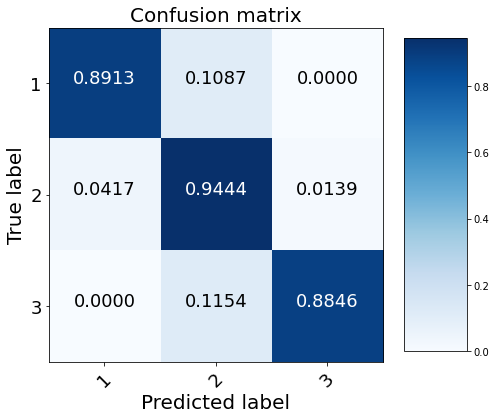

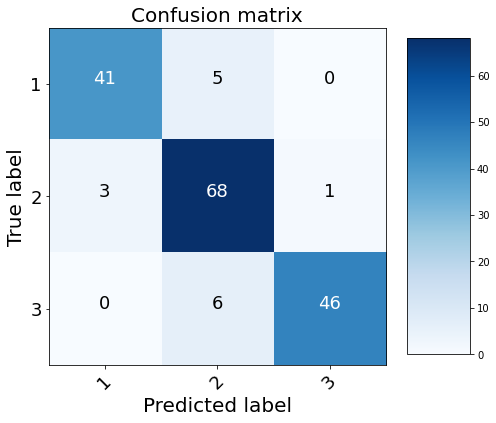

In [11]:
plot_cm(truelevel_journey_based_all, predlevel_journey_based_all)

In [12]:
print(len(truelevel_journey_based_all), len(predlevel_journey_based_all))

170 170
